In [1]:
### Machine Learning and Deep Learning - Homework 1 ###

### 1. Load Wine dataset (scikit library)

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset = load_wine()
attributes = pd.DataFrame(dataset.data)
targets = pd.Series(dataset.target)
target_names = pd.Series(dataset.target_names)
target_counts = pd.DataFrame({'Target_name':target_names, 'Total':targets.value_counts(sort=False)})

# Analyze data

print("Wine dataset is composed by " + str(attributes.shape[0]) + " instances")
print("Each instance is divided in " + str(attributes.shape[1]) + " attributes")
print("There are " + str(targets.unique().size) + " different classes")
print("There are " + str(attributes.isna().sum().sum()) + " null values")
print("\nClass distribution\n")
print(target_counts)
print("\n")

# Pie chart

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
colors = ["red", "green", "blue"]

def func(pct, allvals):
    absolute = int(np.round(pct, 2)/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(target_counts['Total'].tolist(), colors=colors, autopct=lambda pct: func(pct, target_counts['Total'].tolist()), textprops=dict(color="w"))
ax.legend(wedges, dataset.target_names, title="Target names", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Class Distribution")

plt.show()



Wine dataset is composed by 178 instances
Each instance is divided in 13 attributes
There are 3 different classes
There are 0 null values

Class distribution

  Target_name  Total
0     class_0     59
1     class_1     71
2     class_2     48




<Figure size 600x300 with 1 Axes>

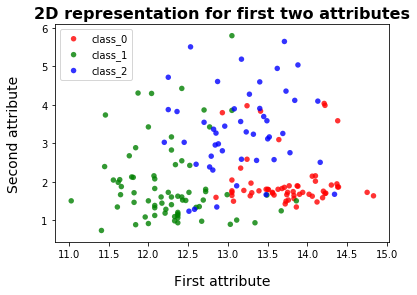

In [2]:
### 2. Select the first two attributes for a 2D representation of the image

import matplotlib.pyplot as plt

first_two_attributes = pd.DataFrame({'First_feature' : attributes[0], 'Second_feature' : attributes[1], 'Class' : targets})

mask_0 = (first_two_attributes['Class'] == 0)
mask_1 = (first_two_attributes['Class'] == 1)
mask_2 = (first_two_attributes['Class'] == 2)

g0 = (first_two_attributes.loc[mask_0, 'First_feature'].to_numpy(), first_two_attributes.loc[mask_0, 'Second_feature'].to_numpy())
g1 = (first_two_attributes.loc[mask_1, 'First_feature'].to_numpy(), first_two_attributes.loc[mask_1, 'Second_feature'].to_numpy())
g2 = (first_two_attributes.loc[mask_2, 'First_feature'].to_numpy(), first_two_attributes.loc[mask_2, 'Second_feature'].to_numpy())

data = (g0, g1, g2)
colors = ("red", "green", "blue")
groups = (target_names.values[0], target_names.values[1], target_names.values[2])

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('2D representation for first two attributes', size=16, weight='bold')
plt.legend(loc=2)
plt.xlabel('First attribute', labelpad=15, size=14, weight='medium')
plt.ylabel('Second attribute', labelpad=20, size=14, weight='medium')
plt.show()

In [3]:
### 3. Randomly split data into train, validation and test sets in proportion 5:2:3 (and Standardization)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

max_1 = attributes[0].max()
min_1 = attributes[0].min()
max_2 = attributes[1].max()
min_2 = attributes[1].min()
mean_1 = attributes[0].mean()
mean_2 = attributes[1].mean()
std_1 = attributes[0].std()
std_2 = attributes[1].std()

print("First attribute -> Max_value = " + str(max_1) + ", Min_value = " + str(min_1) + ", mean = {0:.2f}, std = {1:.2f}".format(mean_1, std_1))
print("Second attribute -> Max_value = " + str(max_2) + ", Min_value = " + str(min_2) + ", mean = {0:.2f}, std = {1:.2f}".format(mean_2, std_2))
print("\nAs we can see, first attribute values and second attribute values are different of one order of magnitude, so we have to apply Standardization to data")

X_train, X_val, y_train, y_val = train_test_split(attributes, targets, test_size=0.5, random_state=56, stratify=targets, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.6, random_state=32, stratify=y_val, shuffle=True)

print("Class distribution in the sets:\n")

print("Training set\n")
print(y_train.value_counts(sort=False))
print("Validation set\n")
print(y_val.value_counts(sort=False))
print("Test set")
print(y_test.value_counts(sort=False))

X_train_val = pd.concat((X_train, X_val))
y_train_val = pd.concat((y_train, y_val))

First attribute -> Max_value = 14.83, Min_value = 11.03, mean = 13.00, std = 0.81
Second attribute -> Max_value = 5.8, Min_value = 0.74, mean = 2.34, std = 1.12

As we can see, first attribute values and second attribute values are different of one order of magnitude, so we have to apply Standardization to data
Class distribution in the sets:

Training set

0    30
1    35
2    24
dtype: int64
Validation set

0    11
1    14
2    10
dtype: int64
Test set
0    18
1    22
2    14
dtype: int64


In [4]:
# Function to perform all the classifiers

from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

def apply_classifier(clf, params, X_train, y_train, X_val, y_val, i):
    
    scores = {}
    scores_list = []

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#0000FF'])
    
    # Standardization

    scaler = StandardScaler()

    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train))
    X_val = pd.DataFrame(scaler.transform(X_val))

    for p in params:
        # a. Apply the classifier
        
        if i == 0:
            d = {'n_neighbors': p}
        elif i == 1:
            d = {'C': p, 'max_iter': 1e7}
        elif i == 2:
            d = {'C': p, 'kernel':'rbf', 'gamma':'scale'}
            
        clf.set_params(**d)
        clf.fit(X_train[[0, 1]], y_train)

        # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X_train[[0]].to_numpy().min() - 1, X_train[[0]].to_numpy().max() + 1
        y_min, y_max = X_train[[1]].to_numpy().min() - 1, X_train[[1]].to_numpy().max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

        # Predict class using data and the classifier
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points

        #plt.contour(xx, yy, Z, colors='black', alpha=0.8, linewidths=0.5) #- option for contours among classes
        plt.scatter(X_train[[0]].to_numpy(), X_train[[1]].to_numpy(), c=np.c_[y_train], cmap=cmap_bold, edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        if i == 0:
            plt.title("k = %d" % p, size=16, weight='bold');
        else:
            plt.title("C = %.3f" % p, size=16, weight='bold');
        plt.xlabel('First attribute', labelpad=15, size=14, weight='medium')
        plt.ylabel('Second attribute', labelpad=10, size=14, weight='medium')
        plt.show()
        y_pred = clf.predict(X_val[[0,1]])
        scores[p] = metrics.accuracy_score(y_val, y_pred) * 100
        scores_list.append(metrics.accuracy_score(y_val, y_pred) * 100)
        if i == 0:
            print('Apply K-Nearest Neighbors with K = ' + str(p) + ' -> Accuracy = ' + str(metrics.accuracy_score(y_val, y_pred)*100))
        elif i == 1:
            print('Apply Linear SVM with C = ' + str(p) + ' -> Accuracy = ' + str(metrics.accuracy_score(y_val, y_pred)*100))
        elif i == 2:
            print('Apply RBF Kernel with C = ' + str(p) + ' -> Accuracy = ' + str(metrics.accuracy_score(y_val, y_pred)*100))
    
    return scores, scores_list
        


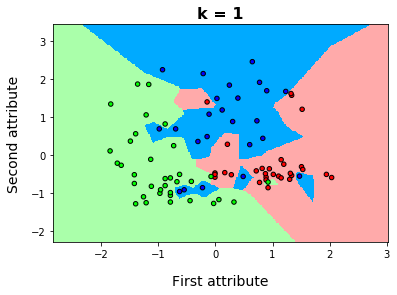

Apply K-Nearest Neighbors with K = 1 -> Accuracy = 71.42857142857143


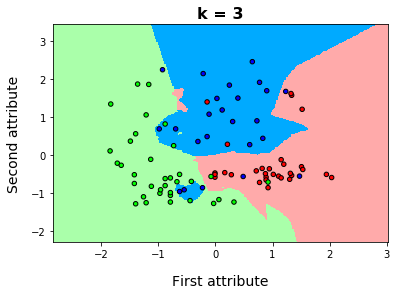

Apply K-Nearest Neighbors with K = 3 -> Accuracy = 77.14285714285715


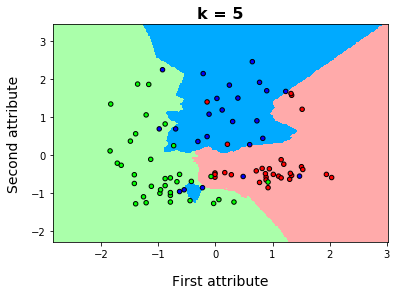

Apply K-Nearest Neighbors with K = 5 -> Accuracy = 80.0


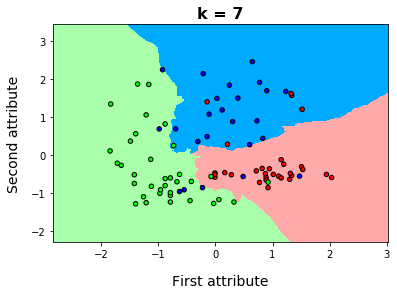

Apply K-Nearest Neighbors with K = 7 -> Accuracy = 82.85714285714286


In [5]:
### 4. Apply K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

K = [1, 3, 5, 7]
knn = KNeighborsClassifier()

knn_scores, knn_scores_list = apply_classifier(knn, K, X_train, y_train, X_val, y_val, 0)

In [6]:
# Function to plot the accuracy

def plot_accuracy(params, scores_list, i):
    np_scores = np.array(scores_list)
    plt.figure()
    plt.grid(axis='y')
    if i == 0:
        plt.xticks(params)
    plt.ylim(np_scores.min() - 5, np_scores.max() + 5)
    plt.plot(params, scores_list, color='navy', linestyle='solid')
    plt.title("Accuracy on Validation", size=16, weight='bold')
    if i == 0:
        plt.xlabel("Value of K", labelpad=15, size=14, weight='medium')
    else:
        plt.xlabel("Value of C", labelpad=15, size=14, weight='medium')
    plt.ylabel("Accuracy percentage %", labelpad=20, size=14, weight='medium')
    plt.show()
    
    return;

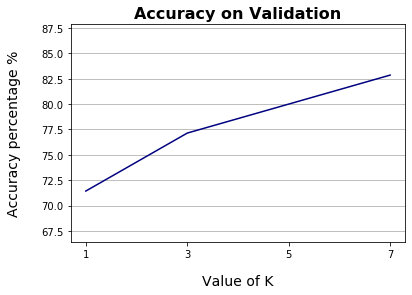

In [7]:
### 5. Plot a graph showing how the accuracy on the validation set varies when changing K

plot_accuracy(K, knn_scores_list, 0)

In [8]:
### 6. How the boundaries change? Why?

print("\nHighest is the value of K and less is the possibility to have misclassification, as we can see in the graphs\n")


Highest is the value of K and less is the possibility to have misclassification, as we can see in the graphs



In [9]:
# Function to evaluate the model on the test set using best parameters

def evaluate_best (scores, clf, X_train_val, X_test, y_train_val, y_test, i):
    best_p = max(scores, key=scores.get)
    if i == 0:
        d = {'n_neighbors': best_p}
    elif i == 1:
        d = {'C': best_p, 'max_iter': 1e7}
    elif i == 2:
        d = {'C': best_p, 'kernel': 'rbf', 'gamma': 'scale'}
            
    clf.set_params(**d)
    
    scaler = StandardScaler()
    scaler.fit(X_train_val)
    X_train_val = pd.DataFrame(scaler.transform(X_train_val))
    X_test = pd.DataFrame(scaler.transform(X_test))

    clf.fit(X_train_val[[0, 1]], y_train_val)
    y_pred_test = clf.predict(X_test[[0,1]])
    
    if i == 0:
        print('Apply K-Nearest Neighbors with best K = ' + str(best_p) + ' on test set -> Accuracy = ' + str(metrics.accuracy_score(y_test, y_pred_test)*100))
    elif i == 1:
        print('Apply Linear SVM with best C = ' + str(best_p) + ' on test set -> Accuracy = ' + str(metrics.accuracy_score(y_test, y_pred_test)*100))
    elif i == 2:
        print('Apply RBF Kernel with best C = ' + str(best_p) + ' on test set -> Accuracy = ' + str(metrics.accuracy_score(y_test, y_pred_test)*100))
    

In [10]:
### 7. Use the best value of K and evaluate the model on the test set

evaluate_best(knn_scores, knn, X_train_val, X_test, y_train_val, y_test, 0)


Apply K-Nearest Neighbors with best K = 7 on test set -> Accuracy = 75.92592592592592


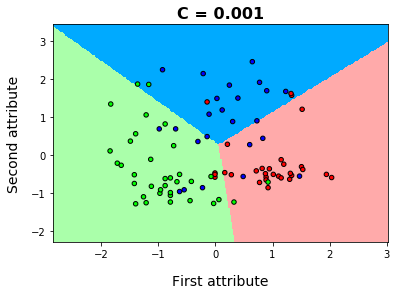

Apply Linear SVM with C = 0.001 -> Accuracy = 77.14285714285715


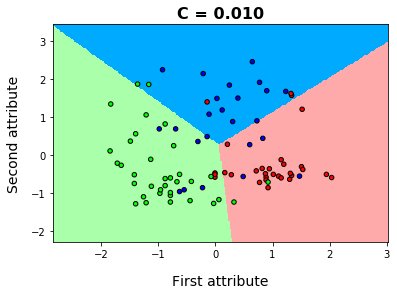

Apply Linear SVM with C = 0.01 -> Accuracy = 77.14285714285715


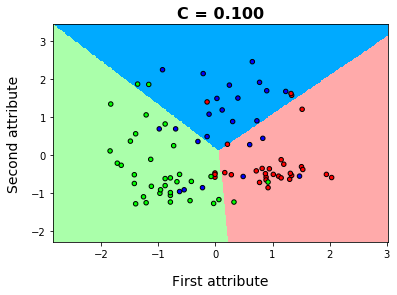

Apply Linear SVM with C = 0.1 -> Accuracy = 80.0


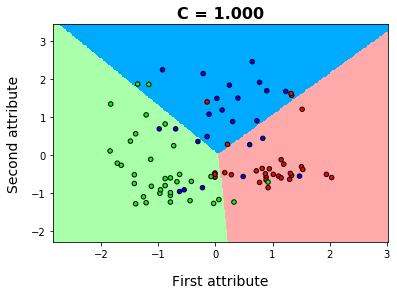

Apply Linear SVM with C = 1 -> Accuracy = 80.0


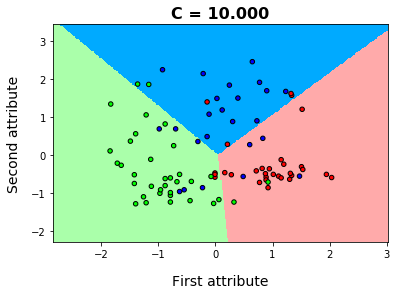

Apply Linear SVM with C = 10 -> Accuracy = 80.0


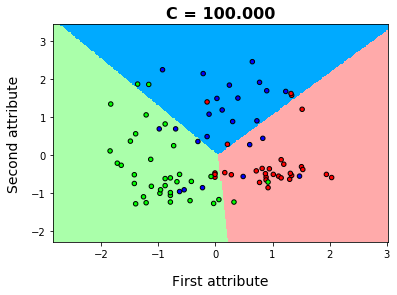

Apply Linear SVM with C = 100 -> Accuracy = 80.0


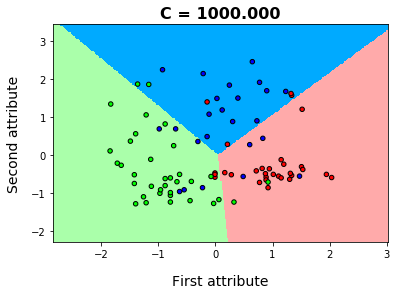

Apply Linear SVM with C = 1000 -> Accuracy = 80.0


In [11]:
### 8. Apply Linear SVM classifier

from sklearn.svm import LinearSVC

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
linear_SVM = LinearSVC()

SVM_scores, SVM_scores_list = apply_classifier(linear_SVM, C, X_train, y_train, X_val, y_val, 1)

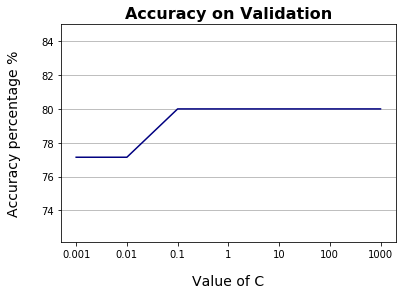

In [12]:
### 9. Plot a graph showing how the accuracy on the validation set varies when changing C

C_text = ['0.001', '0.01', '0.1', '1', '10', '100', '1000']
plot_accuracy(C_text, SVM_scores_list, 1)


In [13]:
### 11. Use the best value of C and evaluate the model on the test set

evaluate_best(SVM_scores, linear_SVM, X_train_val, X_test, y_train_val, y_test, 1)

Apply Linear SVM with best C = 0.1 on test set -> Accuracy = 79.62962962962963


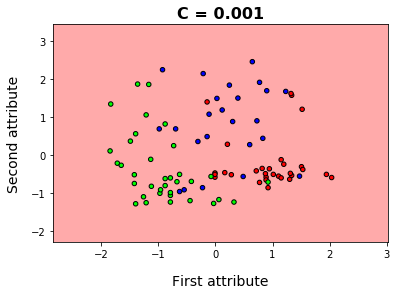

Apply RBF Kernel with C = 0.001 -> Accuracy = 40.0


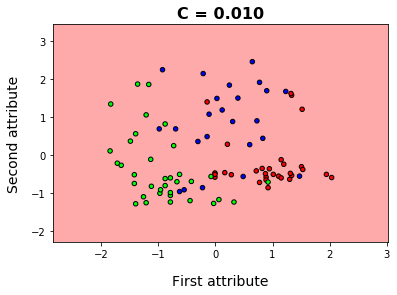

Apply RBF Kernel with C = 0.01 -> Accuracy = 40.0


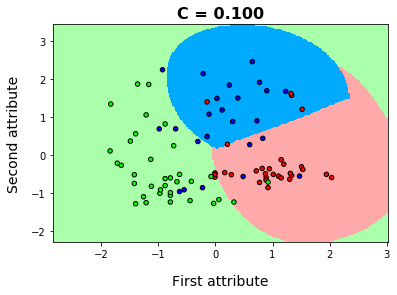

Apply RBF Kernel with C = 0.1 -> Accuracy = 77.14285714285715


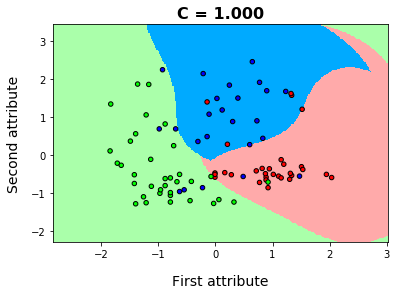

Apply RBF Kernel with C = 1 -> Accuracy = 80.0


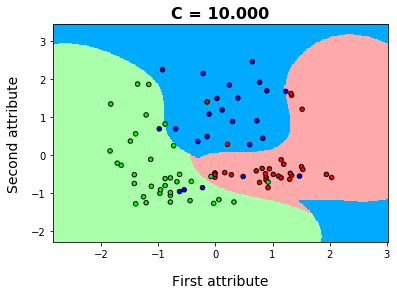

Apply RBF Kernel with C = 10 -> Accuracy = 85.71428571428571


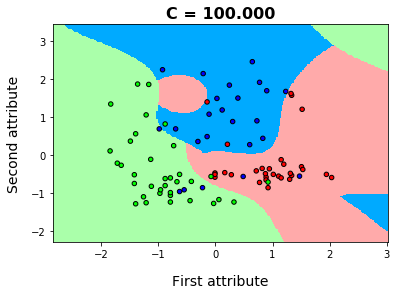

Apply RBF Kernel with C = 100 -> Accuracy = 77.14285714285715


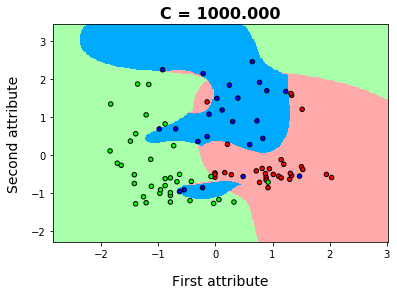

Apply RBF Kernel with C = 1000 -> Accuracy = 68.57142857142857


In [14]:
### 12. Apply RBF Kernel classifier

from sklearn.svm import SVC

RBF_kernel = SVC()
RBF_scores, RBF_scores_list = apply_classifier(RBF_kernel, C, X_train, y_train, X_val, y_val, 2)

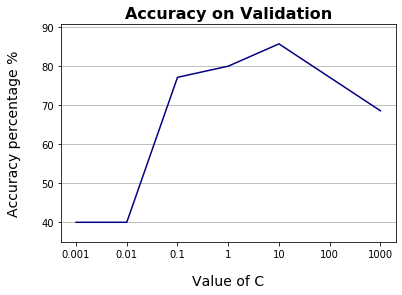

In [15]:
### 12.b. Plot a graph showing how the accuracy on the validation set varies when changing C

plot_accuracy(C_text, RBF_scores_list, 2)

In [16]:
### 13. Evaluate the best C on test set

evaluate_best(RBF_scores, RBF_kernel, X_train_val, X_test, y_train_val, y_test, 2)

Apply RBF Kernel with best C = 10 on test set -> Accuracy = 77.77777777777779


In [17]:
### My GridSearch

def my_GridSearch(clf, C_range, gamma_range, X_train, y_train, X_val, y_val):
    
    grid = pd.DataFrame(index=gamma_range, columns=C_range)
    
    # Standardization

    scaler = StandardScaler()

    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train))
    X_val = pd.DataFrame(scaler.transform(X_val))
    
    for g in gamma_range:
        for c in C_range:
            
            d = {'C': c, 'kernel': 'rbf', 'gamma': g}
            clf.set_params(**d)
            clf.fit(X_train[[0, 1]], y_train)
            y_pred = clf.predict(X_val[[0,1]])
            grid.loc[g, c] =  metrics.accuracy_score(y_val, y_pred) * 100
    
    return grid

In [18]:
def evaluate_best_gridsearch(best_C, best_gamma, clf, X_train_val, X_test, y_train_val, y_test, i):
    d = {'C': best_C, 'kernel': 'rbf', 'gamma': 'scale'}

    clf.set_params(**d)
    
    scaler = StandardScaler()
    scaler.fit(X_train_val)
    X_train_val = pd.DataFrame(scaler.transform(X_train_val))
    X_test = pd.DataFrame(scaler.transform(X_test))

    clf.fit(X_train_val[[0, 1]], y_train_val)
    y_pred_test = clf.predict(X_test[[0,1]])
    
    if i == 0:
        print('Apply RBF Kernel with best C = ' + str(best_C) + " and best gamma = "+ str(best_gamma) + ' on test set -> Accuracy = ' + str(metrics.accuracy_score(y_test, y_pred_test)*100))

In [19]:
def plot_boundaries(C, gamma, clf, X_train_val, X_test, y_train_val, y_test, i):

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#0000FF'])
    
    # Standardization

    scaler = StandardScaler()

    scaler.fit(X_train_val)

    X_train_val = pd.DataFrame(scaler.transform(X_train_val))
    X_test = pd.DataFrame(scaler.transform(X_test))
    
    d = {'C': C, 'kernel': 'rbf', 'gamma': gamma}
    clf.set_params(**d)
    clf.fit(X_train_val[[0, 1]], y_train_val)

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train_val[[0]].to_numpy().min() - 1, X_train_val[[0]].to_numpy().max() + 1
    y_min, y_max = X_train_val[[1]].to_numpy().min() - 1, X_train_val[[1]].to_numpy().max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),np.arange(y_min, y_max, .02))

    # Predict class using data and the classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points

    #plt.contour(xx, yy, Z, colors='black', alpha=0.2, linewidths=0.5) #- option for contours among classes
    plt.scatter(X_train_val[[0]].to_numpy(), X_train_val[[1]].to_numpy(), c=np.c_[y_train_val.to_numpy()], cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if i == 0:
         plt.title("C = %.3f" % C + ", gamma = %f" % gamma, size=16, weight='bold');
    plt.xlabel('First attribute', labelpad=15, size=14, weight='medium')
    plt.ylabel('Second attribute', labelpad=10, size=14, weight='medium')
    plt.show()

C values:
[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
Gamma values: 
[1e-07, 1e-05, 0.001, 0.1, 10.0, 1000.0]


             0.01     0.10     1.00     10.00    100.00   1000.00
1.000000e-07      40       40       40       40       40       40
1.000000e-05      40       40       40       40       40  68.5714
1.000000e-03      40       40       40  68.5714       80       80
1.000000e-01      40  68.5714  77.1429       80  82.8571  85.7143
1.000000e+01      40  42.8571  77.1429  71.4286  65.7143  65.7143
1.000000e+03      40       40       40  45.7143  45.7143  45.7143


Grid search of best parameters on validation set
Applying grid search to RBF Kernel we obtain this configuration -> C = 1000.0, gamma = 0.1 with Accuracy = 85.71
Apply RBF Kernel with best C = 1000.0 and best gamma = 0.1 on test set -> Accuracy = 81.48148148148148


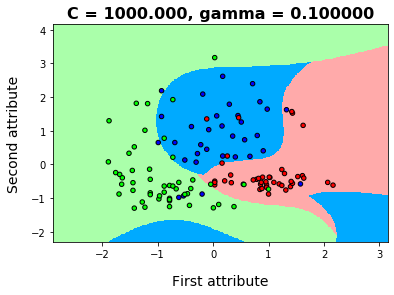

In [20]:
### 15. Perform Grid Search on RBF kernel classifier

# I chose the following C and gamma range values

C_range = np.logspace(-2, 3, 6)
print("C values:")
print(C_range.tolist())
gamma_range = np.logspace(-7, 3, 6)
print("Gamma values: ")
print(gamma_range.tolist())
print("\n")

grid = my_GridSearch(RBF_kernel, C_range, gamma_range, X_train, y_train, X_val, y_val)

print(grid)
print("\n")

max_GridSearch_Accuracy = grid.values.max()
max_index, max_column = grid.stack().index[np.argmax(grid.values)]

print("Grid search of best parameters on validation set")
print('Applying grid search to RBF Kernel we obtain this configuration -> C = ' + str(max_column) + ', gamma = '+ str(max_index) +' with Accuracy = ' + "{0:.2f}".format(max_GridSearch_Accuracy))

evaluate_best_gridsearch(max_column, max_index, RBF_kernel, X_train_val, X_test, y_train_val, y_test, 0)
plot_boundaries(max_column, max_index, RBF_kernel, X_train_val, X_test, y_train_val, y_test, 0)

In [21]:
### 16. Merge the training and validation split

X_train_val

,0,1,2,3,4,5,6,7,8,9,10,11,12
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0
148,13.32,3.24,2.38,21.5,92.0,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650.0
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
42,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0
139,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0
75,11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428.0


In [22]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

def KFold_GridSearch(estimator, param_grid, X_train_val, y_train_val, X_test, y_test):
    
    # Standardization

    scaler = StandardScaler()

    scaler.fit(X_train_val)

    X_train_val = pd.DataFrame(scaler.transform(X_train_val))
    X_test = pd.DataFrame(scaler.transform(X_test))
    
    clf =  GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
    clf.fit(X_train_val, y_train_val)
    
    print("Best parameters on training set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on training set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    
    return clf.best_params_['C'], clf.best_params_['gamma']

In [23]:
### 17. Grid search for gamma and C performing a 5-fold validation 

param_grid = {'kernel' : ['rbf'], 'C' : C_range.tolist(), 'gamma': gamma_range.tolist()}

best_C_KFold, best_gamma_KFold = KFold_GridSearch(RBF_kernel, param_grid, X_train_val, y_train_val, X_test, y_test)

print(best_C_KFold)

Best parameters on training set:

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on training set:

0.395 (+/-0.013) for {'C': 0.01, 'gamma': 1e-07, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.01, 'gamma': 10.0, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.01, 'gamma': 1000.0, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.1, 'gamma': 1e-07, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.952 (+/-0.079) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.1, 'gamma': 1000.0, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 1.0, 'gamma': 1e-07, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 1.0, 'gamma': 1e-05

C:\Users\alede\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Apply RBF Kernel with best C = 1.0 and best gamma = 0.1 on test set -> Accuracy = 79.62962962962963


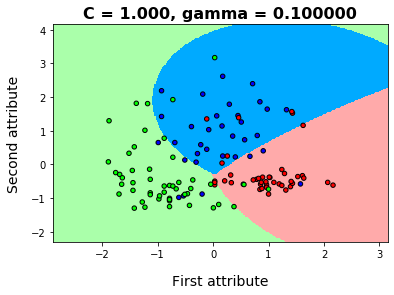

In [24]:
### 18. Evaluate the parameters on the test set

evaluate_best_gridsearch(best_C_KFold, best_gamma_KFold, RBF_kernel, X_train_val, X_test, y_train_val, y_test, 0)
plot_boundaries(best_C_KFold, best_gamma_KFold, RBF_kernel, X_train_val, X_test, y_train_val, y_test, 0)

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
from numpy import set_printoptions

def choose_different_pairs(X, y):
    X_new = pd.DataFrame(SelectKBest(f_classif, k=2).fit_transform(X, y))
    return X_new

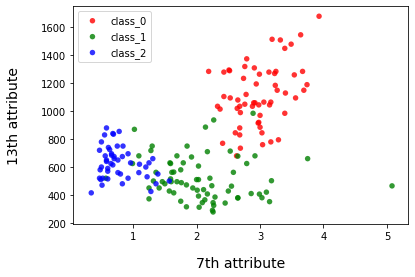

In [26]:
### 20. Choose different pairs

best_attributes = choose_different_pairs(attributes, targets)

# features 6 and 12 are chosen (the seventh and the last)

two_attributes = pd.DataFrame({'First_feature' : attributes[6], 'Second_feature' : attributes[12], 'Class' : targets})

mask_0 = (two_attributes['Class'] == 0)
mask_1 = (two_attributes['Class'] == 1)
mask_2 = (two_attributes['Class'] == 2)

g0 = (two_attributes.loc[mask_0, 'First_feature'].to_numpy(), two_attributes.loc[mask_0, 'Second_feature'].to_numpy())
g1 = (two_attributes.loc[mask_1, 'First_feature'].to_numpy(), two_attributes.loc[mask_1, 'Second_feature'].to_numpy())
g2 = (two_attributes.loc[mask_2, 'First_feature'].to_numpy(), two_attributes.loc[mask_2, 'Second_feature'].to_numpy())

data = (g0, g1, g2)
colors = ("red", "green", "blue")
groups = (target_names.values[0], target_names.values[1], target_names.values[2])

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

#plt.title('2D representation for first two attributes', size=16, weight='bold')
plt.legend(loc=2)
plt.xlabel('7th attribute', labelpad=15, size=14, weight='medium')
plt.ylabel('13th attribute', labelpad=20, size=14, weight='medium')
plt.show()

X_train, X_val, y_train, y_val = train_test_split(best_attributes, targets, test_size=0.5, random_state=56, stratify=targets, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.6, random_state=32, stratify=y_val, shuffle=True)

X_train_val = pd.concat((X_train, X_val))
y_train_val = pd.concat((y_train, y_val))

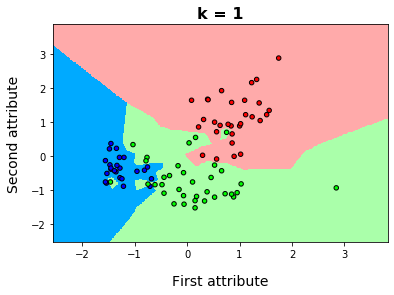

Apply K-Nearest Neighbors with K = 1 -> Accuracy = 88.57142857142857


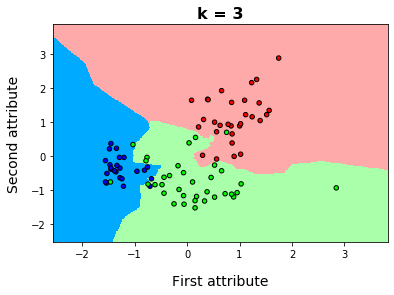

Apply K-Nearest Neighbors with K = 3 -> Accuracy = 91.42857142857143


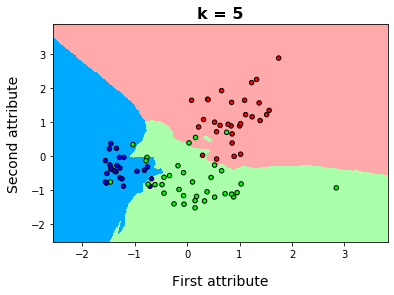

Apply K-Nearest Neighbors with K = 5 -> Accuracy = 85.71428571428571


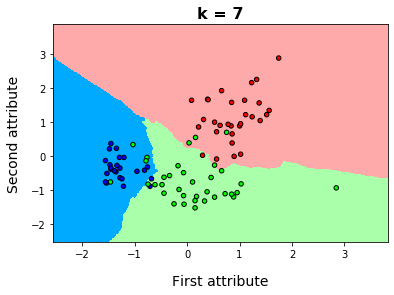

Apply K-Nearest Neighbors with K = 7 -> Accuracy = 88.57142857142857
Apply K-Nearest Neighbors with best K = 3 on test set -> Accuracy = 90.74074074074075


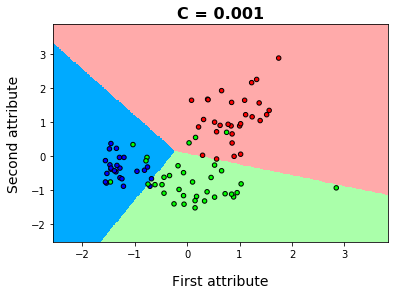

Apply Linear SVM with C = 0.001 -> Accuracy = 91.42857142857143


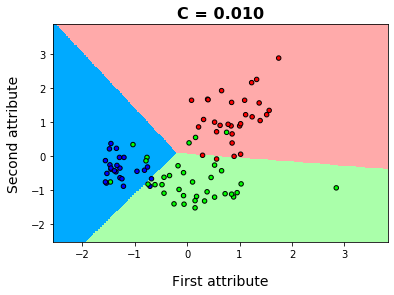

Apply Linear SVM with C = 0.01 -> Accuracy = 91.42857142857143


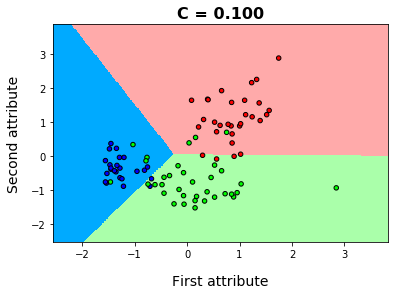

Apply Linear SVM with C = 0.1 -> Accuracy = 94.28571428571428


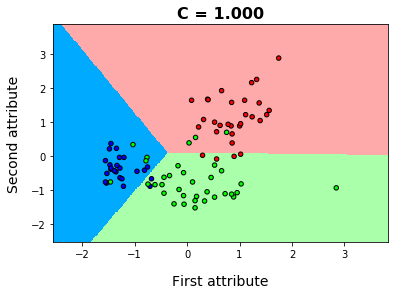

Apply Linear SVM with C = 1 -> Accuracy = 94.28571428571428


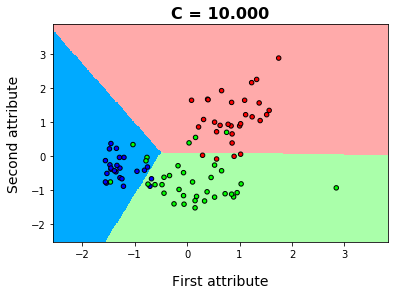

Apply Linear SVM with C = 10 -> Accuracy = 94.28571428571428


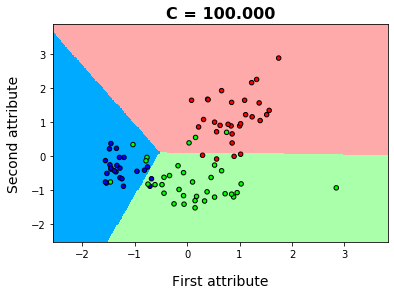

Apply Linear SVM with C = 100 -> Accuracy = 94.28571428571428


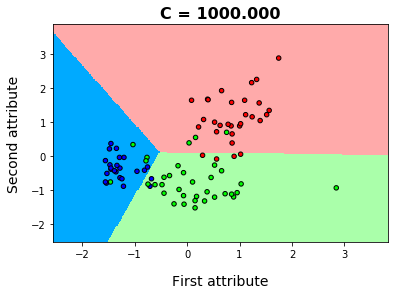

Apply Linear SVM with C = 1000 -> Accuracy = 94.28571428571428
Apply Linear SVM with best C = 0.1 on test set -> Accuracy = 92.5925925925926


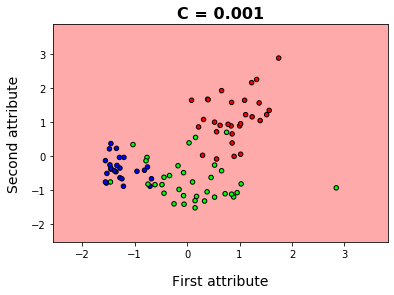

Apply RBF Kernel with C = 0.001 -> Accuracy = 40.0


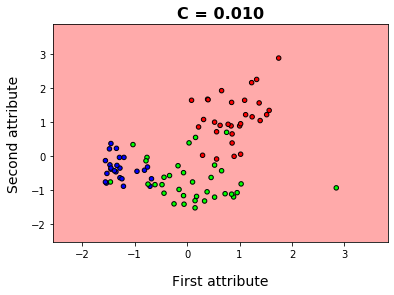

Apply RBF Kernel with C = 0.01 -> Accuracy = 40.0


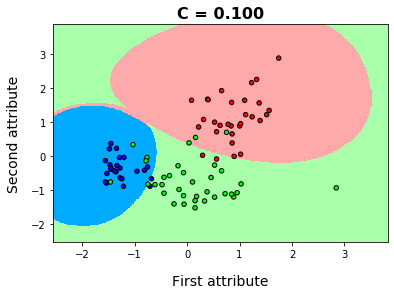

Apply RBF Kernel with C = 0.1 -> Accuracy = 91.42857142857143


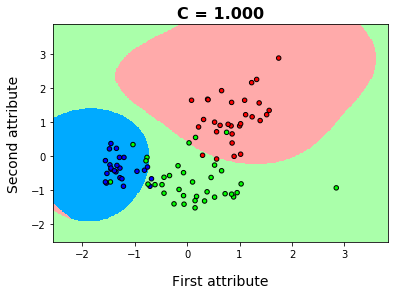

Apply RBF Kernel with C = 1 -> Accuracy = 94.28571428571428


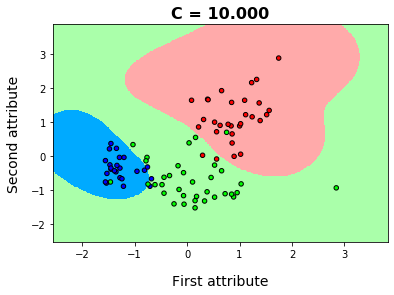

Apply RBF Kernel with C = 10 -> Accuracy = 94.28571428571428


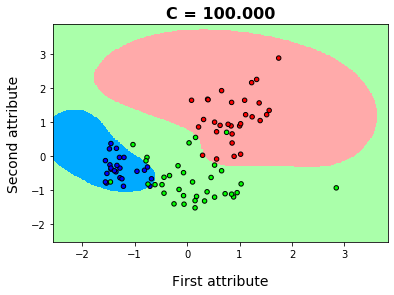

Apply RBF Kernel with C = 100 -> Accuracy = 88.57142857142857


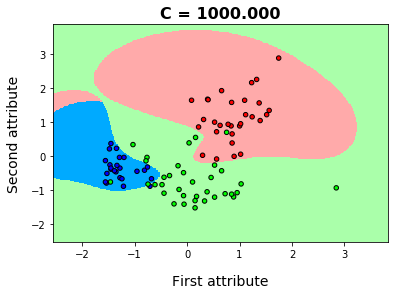

Apply RBF Kernel with C = 1000 -> Accuracy = 85.71428571428571
Apply RBF Kernel with best C = 1 on test set -> Accuracy = 92.5925925925926


In [27]:
### Apply K-Nearest Neighbors

K = [1, 3, 5, 7]
knn = KNeighborsClassifier()

knn_scores, knn_scores_list = apply_classifier(knn, K, X_train, y_train, X_val, y_val, 0)
evaluate_best(knn_scores, knn, X_train_val, X_test, y_train_val, y_test, 0)

### Apply Linear SVM classifier

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
linear_SVM = LinearSVC()

SVM_scores, SVM_scores_list = apply_classifier(linear_SVM, C, X_train, y_train, X_val, y_val, 1)
evaluate_best(SVM_scores, linear_SVM, X_train_val, X_test, y_train_val, y_test, 1)

### Apply RBF Kernel classifier

RBF_kernel = SVC()
RBF_scores, RBF_scores_list = apply_classifier(RBF_kernel, C, X_train, y_train, X_val, y_val, 2)
evaluate_best(RBF_scores, RBF_kernel, X_train_val, X_test, y_train_val, y_test, 2)

C values:
[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
Gamma values: 
[1e-07, 1e-05, 0.001, 0.1, 10.0, 1000.0]


             0.01     0.10     1.00     10.00    100.00   1000.00
1.000000e-07      40       40       40       40       40       40
1.000000e-05      40       40       40       40       40  74.2857
1.000000e-03      40       40       40  74.2857  94.2857  94.2857
1.000000e-01      40  71.4286  94.2857  94.2857  94.2857  88.5714
1.000000e+01      40       40  88.5714  85.7143  77.1429  77.1429
1.000000e+03      40       40  45.7143  45.7143  45.7143  45.7143


Grid search of best parameters on validation set
Applying grid search to RBF Kernel we obtain this configuration -> C = 100.0, gamma = 0.001 with Accuracy = 94.29
Apply RBF Kernel with best C = 100.0 and best gamma = 0.001 on test set -> Accuracy = 92.5925925925926


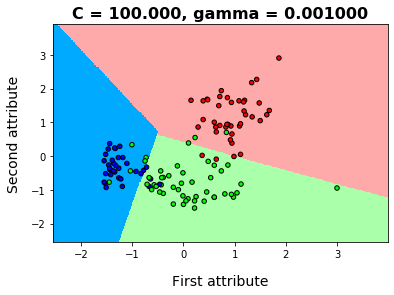

In [28]:
### Perform Grid Search on RBF kernel classifier

# I choose the following C and gamma range values

C_range = np.logspace(-2, 3, 6)
print("C values:")
print(C_range.tolist())
gamma_range = np.logspace(-7, 3, 6)
print("Gamma values: ")
print(gamma_range.tolist())
print("\n")

grid = my_GridSearch(RBF_kernel, C_range, gamma_range, X_train, y_train, X_val, y_val)

print(grid)
print("\n")

max_GridSearch_Accuracy = grid.values.max()
max_index, max_column = grid.stack().index[np.argmax(grid.values)]

print("Grid search of best parameters on validation set")
print('Applying grid search to RBF Kernel we obtain this configuration -> C = ' + str(max_column) + ', gamma = '+ str(max_index) +' with Accuracy = ' + "{0:.2f}".format(max_GridSearch_Accuracy))

evaluate_best_gridsearch(max_column, max_index, RBF_kernel, X_train_val, X_test, y_train_val, y_test, 0)
plot_boundaries(max_column, max_index, RBF_kernel, X_train_val, X_test, y_train_val, y_test, 0)

C:\Users\alede\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters on training set:

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on training set:

0.395 (+/-0.013) for {'C': 0.01, 'gamma': 1e-07, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.01, 'gamma': 10.0, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.01, 'gamma': 1000.0, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.1, 'gamma': 1e-07, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.685 (+/-0.095) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.468 (+/-0.050) for {'C': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 0.1, 'gamma': 1000.0, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 1.0, 'gamma': 1e-07, 'kernel': 'rbf'}
0.395 (+/-0.013) for {'C': 1.0, 'gamma': 1e-05

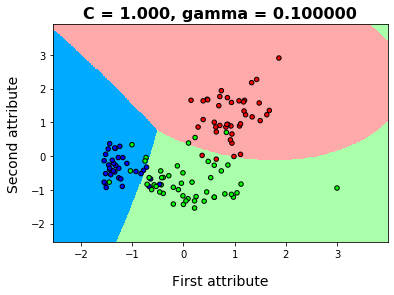

In [29]:
param_grid = {'kernel' : ['rbf'], 'C' : C_range.tolist(), 'gamma': gamma_range.tolist()}

best_C_KFold, best_gamma_KFold = KFold_GridSearch(RBF_kernel, param_grid, X_train_val, y_train_val, X_test, y_test)

print(best_C_KFold)

evaluate_best_gridsearch(best_C_KFold, best_gamma_KFold, RBF_kernel, X_train_val, X_test, y_train_val, y_test, 0)
plot_boundaries(best_C_KFold, best_gamma_KFold, RBF_kernel, X_train_val, X_test, y_train_val, y_test, 0)